<center>
<img src='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMDBjNTczYzE0NTIxMjlmYjg1OGQwN2UxYzk4M2VlYzRlYTUzNjlkMyZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/8qGPuB8AQW3AZuXVSb/giphy.gif' align='center' width="500x">
</center>

###**Тема проекта** 
Венчурные инвестиции в криптопроекты за период с 1 января 2021 года - до 1 января 2023 года

\

---
\

**Источник:** https://cryptorank.io/funding-rounds 

> Один из самых авторитетных источников, предоставляющий данные и аналитику о цифровых активах. Для сбора информации cryptorank использует первоначальные и проверенные источники, включая биржи криптовалют, официальные сайты компаний, новостные ресурсы, пресс-релизы, социальные сети проектов и другие источники, чтобы собирать информацию о финансировании проектов.




#Сбор данных

Был выполнен парсинг источника проекта, отфильтрованного по дате за период с 1 января 2021 года - до 1 января 2023 года

\

---


In [ ]:
import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

**Шаг 1**

Мы нашли в коде сайта местоположения таблиц 

> Так как outerHTML таблиц большие и по размеру, и по весу - мы сохранили ссылки на страницы, как текстовый файл и перенесли в Google Disk для их открытия



In [ ]:
url = "https://drive.google.com/uc?id=1PrjmYUWyA0ncWkkwn_7Girj4OJgjtXId"
with urllib.request.urlopen(url) as response:
    html = response.read().decode()
html = html.split("\n")

**Шаг 2**

Далее мы запарсили таблицы с помощью BeautifulSoup, который находит тег table - элемент, где как раз хранятся наши данные

Нашли все строки и вытащили из каждой информацию про инвестиции в определенный проект

Полученные данные сохранили в df для будущего анализа

In [ ]:
df = []
for i in range(len(html)-1):
    beautiful_soup = BeautifulSoup(html[i], 'html.parser')
    table = beautiful_soup.find('table')
    rows = table.find_all('tr')
    
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        df.append(cols) 

**Шаг 3**

Переформатировали запарсенные данные df в формат pandas и озаглавили столбцы соответственно для более удобного последующего анализа и моделирования

In [ ]:
funding_rounds = pd.DataFrame(df, columns = ['Project', 'Date', 'Raise', 'Stage', 'Funds and investors', 'Category'])

print(funding_rounds.shape)
funding_rounds.head()

(3742, 6)


,Project,Date,Raise,Stage,Funds and investors,Category
0,None,None,None,None,None,None
1,DeSchool,31 Dec 2022,,Seed,y2z Ventures +5,Blockchain Service
2,Magic Fantasy,30 Dec 2022,"$ 3,000,000",Unknown,Easycoins,GameFi
3,Twity,29 Dec 2022,"$ 6,500,000",Series A,Wave Capital,Social
4,wowTalkies,29 Dec 2022,,Unknown,Tangentia Ventures,Social




---

\
**Информация о полученных данных (по столбцам):**

1.    Project - название проекта (стартапа) в Web3, который находится на стадии рейза
2.    Date - дата фандрейза проекта
3.    Raise - сумма финансирования (cумма, которую стартап собрал от инвесторов и/или венчурных фондов, $)
4.    Stage - раунд/стадия развития стартапа, на которую приходится венчурное финансирование
5.    Funds and investors - инвесторы и/или венчурные фонды в проект (ведущий инвестор представленного раунда  + количество других инвесторов проекта)
6.    Category - отрасль, тематика проекта


# Предварительная обработка

Была выполнена первоначальная обработка собранной информации: форматирование данных, заполнение пустых значений, нахождение и корректировка выбросов

\

---


**Шаг 1**

Преобразуем пустые значения в более привычный нам вид NaN

In [ ]:
funding_rounds = funding_rounds.dropna(how='all').replace('', np.nan)

**Шаг 2**

Поработаем над колонкой 'Funds and investors' - разделим ее на два новых столбца:


1.   Lead Investor - ведущий инвестор (инвестор, который чаще всего предоставляет наибольший объем финансирования, обычно он вносит первые инвестиции в стартап и принимает большое участие в будущем развитии проекта)
2.   Investors quantity - количество инвесторов (не включая лид - инвестора)



In [ ]:
funding_rounds[['Lead Investor', 'Investors quantity']] = funding_rounds['Funds and investors'].str.rsplit(' +', n=1, expand=True)
funding_rounds = funding_rounds.drop('Funds and investors', axis=1)

funding_rounds.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,31 Dec 2022,NaN,Seed,Blockchain Service,y2z Ventures,5
2,Magic Fantasy,30 Dec 2022,"$ 3,000,000",Unknown,GameFi,Easycoins,None
3,Twity,29 Dec 2022,"$ 6,500,000",Series A,Social,Wave Capital,None
4,wowTalkies,29 Dec 2022,NaN,Unknown,Social,Tangentia Ventures,None
5,Argo Blockchain,28 Dec 2022,"$ 35,000,000",Debt Financing,Blockchain Service,Galaxy,None


In [ ]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704 entries, 1 to 3741
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Project             3704 non-null   object
 1   Date                3704 non-null   object
 2   Raise               3244 non-null   object
 3   Stage               3704 non-null   object
 4   Category            3678 non-null   object
 5   Lead Investor       3494 non-null   object
 6   Investors quantity  2887 non-null   object
dtypes: object(7)
memory usage: 231.5+ KB


**Проанализировав информацию о данных, мы выявили несколько моментов, требующих обработки:**

1.   На данном этапе все данные имеют тип 'object', хотя у нас есть 
количественные признаки и информация о дате

2.   Есть пропущенные значения:
*   *Столбец 2* - raise (460 пропущенных)
*   *Столбец 4* - category (26 пропущенных)
*   *Столбец 5* - lead investor (210 пропущенных)
*   *Столбец 6* - Investors quantity (817 пропущенных)

\

---


In [ ]:
funding_rounds.isna().sum()

Project                 0
Date                    0
Raise                 460
Stage                   0
Category               26
Lead Investor         210
Investors quantity    817
dtype: int64

**Шаг 3**

Привели значения 'Investors quantity' и 'Raise' к типу float (во втором случае еще удалили значок $ для форматирования)

Привели значения 'Date' к типу datetime

In [ ]:
funding_rounds['Investors quantity'] = pd.to_numeric(funding_rounds['Investors quantity'], errors='coerce')
funding_rounds['Raise'] = funding_rounds['Raise'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True)
funding_rounds['Raise'] = funding_rounds['Raise'].astype(float)
funding_rounds['Date'] = pd.to_datetime(funding_rounds['Date'], format='%d %b %Y')

In [ ]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704 entries, 1 to 3741
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Project             3704 non-null   object        
 1   Date                3704 non-null   datetime64[ns]
 2   Raise               3244 non-null   float64       
 3   Stage               3704 non-null   object        
 4   Category            3678 non-null   object        
 5   Lead Investor       3494 non-null   object        
 6   Investors quantity  2887 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 231.5+ KB



**Как заполняем пустые значения?**

> 
> ---
> *Столбец 2* - Raise
> 
> *Столбец 5* - Lead Investor
> 
> ---
> 
> 1) Если нет данных о рейзе, но есть инвесторы - выносим в отдельную таблицу и находим лучший способ заполнения пропусков 
> 
> 2) Если нет данных об инвесторах, но есть данные о рейзе - ставим вместо NaN: 'Private investor' + количество инвесторов 1
> 
> 3) Если проект не поднял никаких инвестиций и нет данных ни об инвесторах, ни о рейзе, то ставим 0 в рейзе, No investors в Lead investor + в количество инвесторов 0
> 
> ---
> 
> *Столбец 6* - Investors quantity
> 
> ---
> 
> 1) К Investors quantity добавить 1 (это неучтенный лид инвестор)
> 
> 2) Где NaN: 
> - где-то должна быть 1, если есть лид инвестор 
- оставшиеся NaN, если его нет, заполняем: либо 1, как Private Investor (если есть рейз) , либо 0 (если нет рейза)
> 
> ---
> 
> *Столбец 4* - Category (≈ 30 пропущенных)
> 
> ---
> 
> Пустые значения вынесим в отдельную таблицу и заполним, анализируя проекты




**Шаг 4**

Добавили единицу к значениям столбца Investors quantity, поскольку в нём не учитывался ведущий инвестор (такова особенность данных)

In [ ]:
funding_rounds['Investors quantity'] = funding_rounds['Investors quantity'].add(1)

**Шаг 5**

Там где есть информация о лид инвесторе, но нет количества инвесторов, ставим единицу в Investors quantity



In [ ]:
funding_rounds.loc[
    funding_rounds['Lead Investor'].notnull() & funding_rounds['Investors quantity'].isnull(),
    'Investors quantity'
] = 1

**Шаг 6**

Там где нет информации о лид инвесторе, но есть информация о рейзе, ставим единицу в Investors quantity и 'Private investor' в столбце лид инвестора


> Мы сделали предположение, что, скорее всего, инвестиции осуществил какой-то частный инвестор, которого cryptorank не знает





In [ ]:
funding_rounds.loc[
    (funding_rounds['Lead Investor'].isna()) & (funding_rounds['Raise'].notna()),
    ['Lead Investor', 'Investors quantity']
] = ['Private investor', 1]


**Шаг 7**

Там где нет информации о лид инвесторе и нет информации о рейзе, ставим 0 в Investors quantity и 'No investors' в столбце лид инвестора, так как проект не поднял никаких инвестиций

In [ ]:
funding_rounds.loc[
    (funding_rounds['Lead Investor'].isna()) & (funding_rounds['Raise'].isna()),
    ['Lead Investor', 'Investors quantity', 'Raise']
] = ['No investors', 0, 0]

funding_rounds.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,2022-12-31,NaN,Seed,Blockchain Service,y2z Ventures,6.0
2,Magic Fantasy,2022-12-30,3000000.0,Unknown,GameFi,Easycoins,1.0
3,Twity,2022-12-29,6500000.0,Series A,Social,Wave Capital,1.0
4,wowTalkies,2022-12-29,NaN,Unknown,Social,Tangentia Ventures,1.0
5,Argo Blockchain,2022-12-28,35000000.0,Debt Financing,Blockchain Service,Galaxy,1.0


**Шаг 8**

Мы решили, что заполнять оставшиеся пропуски в столбце Raise стоит, учитывая все три критерия


> *Логика:* 
>
> Мы видим, что Raise неизвестен, но зато мы знаем три самых важных признака проекта (стадию, категорию и количество инвесторов), запоминаем их и ищём во всей таблице аналогичные случаи, но те, у которых Raise известен. По всем нашедшим данным нашли среднее значение и заполнили искомый Raise:)

\

> *Замечание*: 
> 
> Поиск среднего даёт нам число, которое совсем не похоже на реальный рэйз. Вряд ли кто-то будет инвестировать в проект странную сумму, например, 3872691823.4832! Этот факт подтверждают прочие суммы рэйзов в таблице - все они ровные, без "копеек". Именно поэтому мы приняли решение округлить среднее до миллионов.






In [ ]:
missing_raise = funding_rounds[funding_rounds['Raise'].isna()]    # находим, где неизвестен Raise

for index, row in missing_raise.iterrows():
    inv_qty = row['Investors quantity']  
    category = row['Category']  
    stage = row['Stage']  

    # фильтруем таблицу, оставляя только известные Raise с таким же количеством инвесторов, категорией и стадией
    known_raise = funding_rounds[
        (funding_rounds['Raise'].notna()) &
        (funding_rounds['Investors quantity'] == inv_qty) &
        (funding_rounds['Category'] == category) &
        (funding_rounds['Stage'] == stage)
    ] 

    if not known_raise.empty:
        avg_raise = known_raise['Raise'].mean()
        avg_raise = round(avg_raise / 1000000) * 1000000    # округляем до миллионов
    else:
        avg_raise = np.nan
    
    funding_rounds.at[index, 'Raise'] = avg_raise    # заполняем пропуск средним значением


In [ ]:
funding_rounds.isna().sum()

Project                0
Date                   0
Raise                 42
Stage                  0
Category              26
Lead Investor          0
Investors quantity     0
dtype: int64



> К сожалению, полностью заполнить пропуски не удалось и у нас осталось ещё **42 пустых рейза.** Это могло произойти из-за отсутствия аналогичных случаев. Мы решили снизить наши требования: теперь для нас достаточно соответствия двум критериям (категории и количеству инвесторов) для того, чтобы считать проект аналогичным и посчитать среднее




In [ ]:
unknown_raise = funding_rounds[funding_rounds['Raise'].isna()]

for index, row in unknown_raise.iterrows():
    inv_qty = row['Investors quantity']    # количество инвесторов в текущей строке
    category = row['Category']    # категория текущей строки
    
    # фильтруем таблицу, оставляя только известные Raise с таким же количеством инвесторов и категорией
    known_raise = funding_rounds[
    (funding_rounds['Raise'].notna()) &
    (funding_rounds['Investors quantity'] == inv_qty) &
    (funding_rounds['Category'] == category)
    ]

    if not known_raise.empty:
        avg_raise = known_raise['Raise'].mean()
    else:
        avg_raise = np.nan
    
    funding_rounds.at[index, 'Raise'] = avg_raise


> У нас осталось всего **2 затерявшихся рейза**! 
> 
> Посмотрим на них:






In [ ]:
unknown_raise = funding_rounds.loc[funding_rounds['Raise'].isna()]
unknown_raise

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
756,LF Labs,2022-07-13,NaN,Seed,NaN,Alliance DAO,1.0
1253,Syndicate,2022-05-03,NaN,Unknown,DeFi,Andreessen Horowitz (a16z),46.0


Рэйз проекта LF Labs нашли по аналогичной стадии и количеству инвесторов:

In [ ]:
filtered_df = funding_rounds[(funding_rounds['Stage'] == 'Seed') & (funding_rounds['Investors quantity'] == 1)]
average_raise = filtered_df['Raise'].mean()
funding_rounds.at[756, 'Raise'] = average_raise

Данные по Syndicate	мы нашли вручную, поскольку аналогов этому проекту в таблице нет. Нам известен Lead Investor, поэтому сделать это не составило большого труда - мы смогли даже найти стадию и категорию! 

> https://cryptorank.io/ru/ico/syndicate-dao#funding-rounds



In [ ]:
funding_rounds.at[1253, 'Raise'] = int(2000000)
funding_rounds.at[1253, 'Stage'] = 'Series A'
funding_rounds.at[1253, 'Category'] = 'DeFi'
funding_rounds.isna().sum()

Project                0
Date                   0
Raise                  0
Stage                  0
Category              26
Lead Investor          0
Investors quantity     0
dtype: int64

**Шаг 9**

Так как проектов, где неизвестны категории не много, мы сами расставили им данные значения, проанализировав сайты и социальные сети проктов и поняв их функцию и цель

In [ ]:
funding_rounds['Category'].value_counts()

Blockchain Service           1137
DeFi                          713
GameFi                        521
CeFi                          444
NFT                           368
Social                        240
Blockchain Infrastructure     237
Stablecoin                     14
Currency                        3
Tokenized Stock                 1
Name: Category, dtype: int64

In [ ]:
no_info_category = funding_rounds.loc[funding_rounds['Category'].isna()]
no_info_category_index = no_info_category.index
no_info_category.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
756,LF Labs,2022-07-13,7.443014e+06,Seed,NaN,Alliance DAO,1.0
782,META WORLDMETAD,2022-07-10,3.000000e+07,Unknown,NaN,Mai Vu Minh,1.0
1134,Seed ClubCLUB,2022-05-18,1.500000e+07,Private Token Sale,NaN,Multicoin Capital,15.0
1284,PeculiumPCL,2022-04-27,1.055000e+07,Unknown,NaN,The Global Emerging Markets Group (GEM),1.0
2004,CardashiftCLAP,2022-01-16,1.500000e+06,Private Token Sale,NaN,Private investor,1.0



**Meta World** - многопользовательская онлайн-игра (GameFi)

**Seed Club** - инкубатор для создания и развития DAO (Blockchain Service)

**PeculiumPCL** - предоставляет финансовые услуги и инвестиции, есть элементы DeFi и AI (DeFi)

**Cardashift** - платформа для продажи и покупки цифровых активов (Blockchain Service)

**Aster Protocol** - космическая игра с использованием технологии блокчейна (GameFi)

**Popop World** - платформа для создания и обмена цифровыми коллекционными карточками, известными как "Pops" (Social)

**Whalemap** - предоставляет аналитические данные и инструменты для трейдеров и инвесторов криптовалют (Blockchain Service)

**Whydah** - платформа для безопасной передачи и хранения данных, авторизации и идентификации (Blockchain Service)

**Saddle** -  протокол, предназначенный для обмена stablecoins на блокчейне Ethereum (DeFi)

**Republic Note** - платформа-посредник между предпринимателями и инвесторами (Blockchain Service)

**PrivacySwap**  - децентрализованная платформа для обмена криптовалюты с фокусом на приватность пользователей (DeFi)

**TAIKAI**  - платформа для проведения соревнований и хакатонов (Blockchain Service)

**FynCom** - система генерации откликов, которая вознаграждает потенциальных клиентов за ответы на звонки/сообщения/эл.письма (Blockchain Service)

**BlockTrade** - CEX / централизованная криптовалютная биржа (DeFi)

**WIVA** - платформа, обеспечивающая доступ к инвестиционным возможностям (Blockchain Service)

**IAGON** - платформа, объединяющая вычислительные ресурсы в глобальное сетевое облако (Blockchain Service)

**EmiSwap** - децентрализованная платформа обмена криптовалютами (DeFi)

**Cryption NetworkC** - экосистема, предоставляющая различные блокчейн-сервисы и инструменты управления цифровыми активами (Blockchain Service)

**Zkchaos** - блокчеин сервис, предоставляющий инструменты для обеспечения конфиденциальности при совершении транзакций с различными криптовалютами (Blockchain Service)

**PolkaDomain** - масштабируемая блокчейн платформа, предоставляющая инфраструктуру для взаимодействия с другими блокчейнами (Blockchain Infrastructure)

**Sil.Finance** - услуги децентрализованного финансового обеспечения (DeFi)

**Siren** - платформа для создания и торговли финансовыми производными на базе блокчейна (DeFi)

**LF Labs**	- не работает сайт - можно	удалить


In [ ]:
funding_rounds.at[782, 'Category'] = 'GameFi'
funding_rounds.at[1134, 'Category'] = 'Blockchain Service'
funding_rounds.at[1284, 'Category'] = 'DeFi'
funding_rounds.at[2004, 'Category'] = 'Blockchain Service'
funding_rounds.at[2077, 'Category'] = 'GameFi'
funding_rounds.at[2227, 'Category'] = 'Social'
funding_rounds.at[2229, 'Category'] = 'Blockchain Service'
funding_rounds.at[2230, 'Category'] = 'Blockchain Service'
funding_rounds.at[2380, 'Category'] = 'DeFi'
funding_rounds.at[2518, 'Category'] = 'Blockchain Service'
funding_rounds.at[2526, 'Category'] = 'DeFi'
funding_rounds.at[2728, 'Category'] = 'Blockchain Service'
funding_rounds.at[2786, 'Category'] = 'Blockchain Service'
funding_rounds.at[2834, 'Category'] = 'CeFi'
funding_rounds.at[2913, 'Category'] = 'Blockchain Service'
funding_rounds.at[2954, 'Category'] = 'Blockchain Service'
funding_rounds.at[2980, 'Category'] = 'Blockchain Service'
funding_rounds.at[3099, 'Category'] = 'DeFi'
funding_rounds.at[3138, 'Category'] = 'Blockchain Service'
funding_rounds.at[3188, 'Category'] = 'Blockchain Service'
funding_rounds.at[3390, 'Category'] = 'Blockchain Infrastructure'
funding_rounds.at[3452, 'Category'] = 'Blockchain Service'
funding_rounds.at[3527, 'Category'] = 'DeFi'
funding_rounds.at[3576, 'Category'] = 'DeFi'
funding_rounds.at[3696, 'Category'] = 'DeFi'
funding_rounds = funding_rounds.drop(756)



> *Замечание*: 
> 
> Мы заметили, что некоторые проекты повторяются, но данные собраны по разным раундам инвестирования стартапа, поэтому мы их не удаляем. Но в будущем, при построении модели - надо скорее всего эту особенность данных учесть



In [ ]:
duplicates = funding_rounds[funding_rounds.duplicated(['Project'], keep=False)]
duplicates = funding_rounds.loc[funding_rounds['Project'].isin(duplicates['Project'])]
duplicates.sort_values(by = 'Project')

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
3653,0x ProtocolZRX,2021-02-05,1.500000e+07,Series A,DeFi,Pantera Capital,7.0
1291,0x ProtocolZRX,2022-04-26,7.000000e+07,Series B,DeFi,Greylock Partners,10.0
2276,2TM,2021-11-30,5.030000e+07,Series B,Blockchain Service,Tribe Capital,5.0
3103,2TM,2021-06-01,2.000000e+08,Series B,Blockchain Service,SoftBank,1.0
2445,5ire5IRE,2021-10-28,2.100000e+07,Seed,Blockchain Infrastructure,GEM Digital,1.0
...,...,...,...,...,...,...,...
1748,tZERO,2022-02-22,5.482179e+07,Strategic,CeFi,Intercontinental Exchange,3.0
521,thirdweb,2022-08-25,2.400000e+07,Series A,Blockchain Service,Haun Ventures,7.0
2195,thirdweb,2021-12-13,5.000000e+06,Seed,Blockchain Service,Mark Cuban,2.0
3392,zCloak Network,2021-04-09,1.300000e+06,Seed,Blockchain Service,IOSG,7.0


# Выбросы

In [ ]:
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

**Проанализируем данные на выбросы**

\

**Шаг 1**

Построим ящик с усами, чтобы понять, есть ли у нас выбросы или наши данные однородны

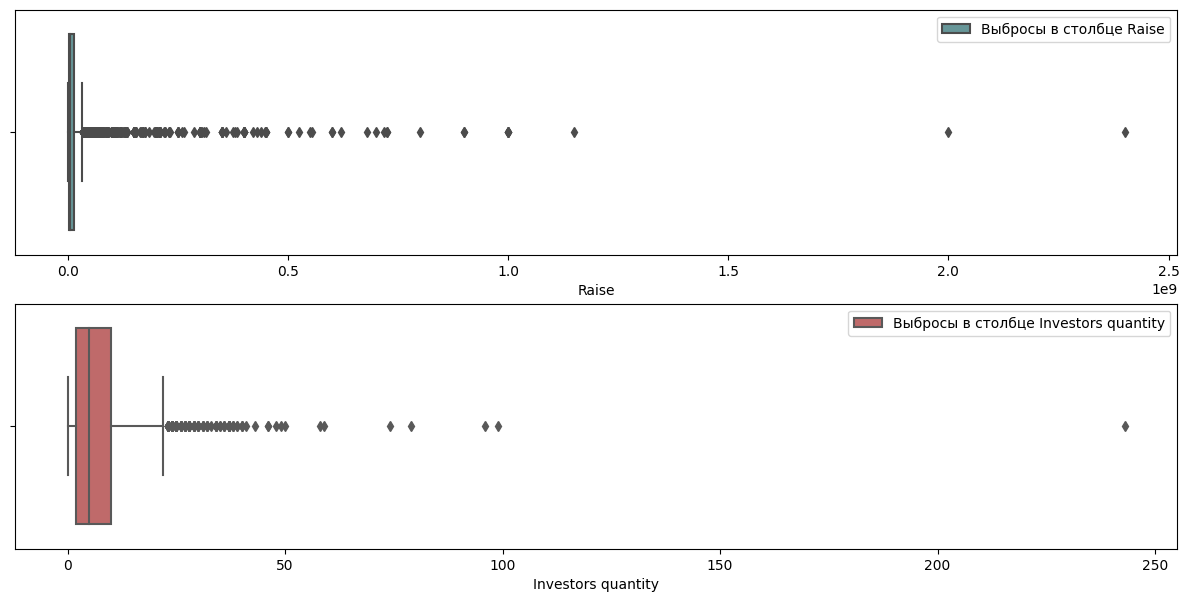

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=funding_rounds, x="Raise", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце Raise'])
hist_2 = sns.boxplot(data = funding_rounds, x ="Investors quantity", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце Investors quantity'])
plt.show()



> В первую очередь заметим, что ящики несимметричны - усики имеют разную длину, что указывает на наличие выбросов и асимметрии в данных.
Ассиметрия логична, ведь есть нижнее ограничение рейза (можно не поднять инвестиций вообще и у нас были такие примеры), а вот верхней границы тут нет: некоторые криптопроекты поднимают инвестиции в несколько миллиардов долларов.
> 
> Что можно еще заметить - это сильно сжатые ящики, что указывает, что в данных нет значительной вариации или разброса и дисперсия скорее всего низкая.
>
> В третьих, у нас есть достаточно много выбросов, так как ящик содержит точки за пределами усов, эчто говорит о наличии экстремальных значений в данных.


**Шаг 2**

Чтобы избавиться от выбросов, которые исказят в будущем анализ и модель, мы использовали метод межквартильного размаха:


1) Вычислили первый и третий квантиль для переменной 'Raise' с помощью функции quantile

2) Вычислили межквартильного размаха (IQR) путем вычитания первого квантиля из третьего

3) Определили нижнюю и верхнюю границы для определения выбросов, которые не входят в данный диапазон


In [ ]:
q_1 = funding_rounds['Raise'].quantile(0.25)
q_3 = funding_rounds['Raise'].quantile(0.75)
IQR = q_3 - q_1
low = q_1 - 1.5 * IQR
up = q_3 + 1.5 * IQR

funding_rounds_new = funding_rounds[(funding_rounds['Raise'] >= low) & (funding_rounds['Raise'] <= up)]
funding_rounds_new.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,2022-12-31,6000000.0,Seed,Blockchain Service,y2z Ventures,6.0
2,Magic Fantasy,2022-12-30,3000000.0,Unknown,GameFi,Easycoins,1.0
3,Twity,2022-12-29,6500000.0,Series A,Social,Wave Capital,1.0
4,wowTalkies,2022-12-29,9000000.0,Unknown,Social,Tangentia Ventures,1.0
6,Centbee,2022-12-28,1000000.0,Pre-Series A,CeFi,Calvin Ayre,1.0


Посмотрим, что получилось:

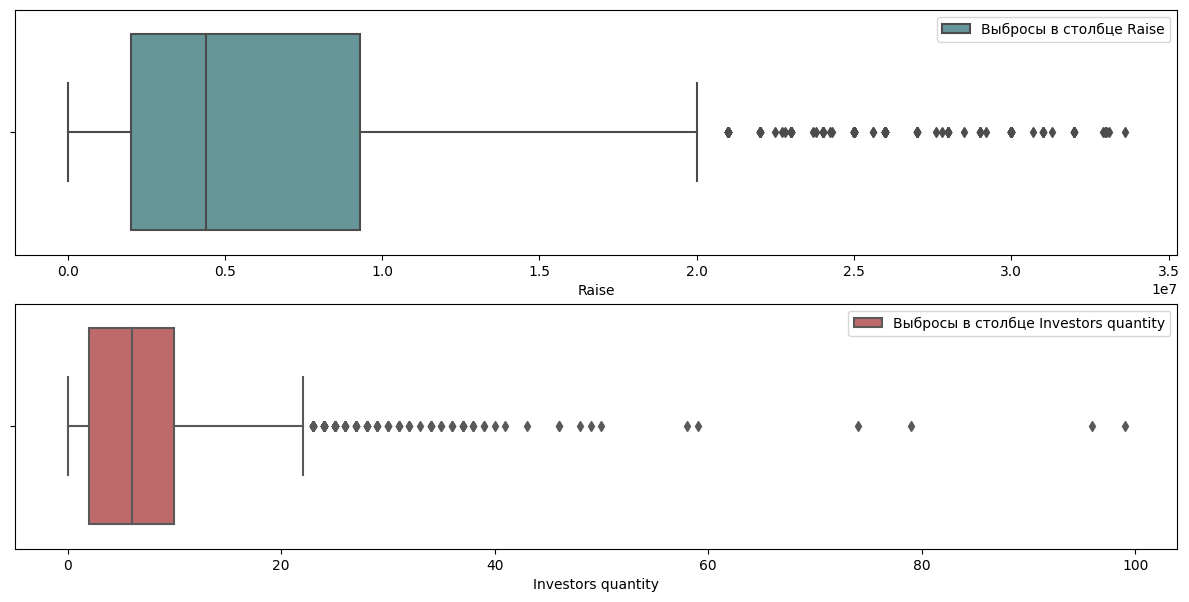

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=funding_rounds_new, x="Raise", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце Raise'])
hist_2 = sns.boxplot(data = funding_rounds_new, x ="Investors quantity", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце Investors quantity'])
plt.show()


> Ящики все еще несимметричны, но как обговаривалось ранне тут это логично. Также ящики менее сжатые и выбросов за их пределами меньше.
>
> В целом, метод межквартильного размаха улучшил ситуацию

# Визуализация и первые гипотезы

**Шаг 1**

Мы рассмотрели категориальный признак - Category

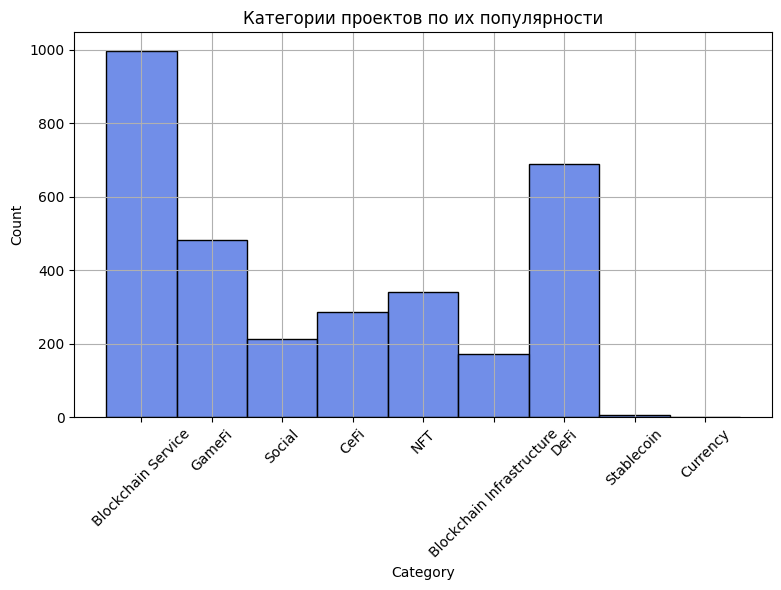

In [ ]:
plt.figure(figsize=(9, 5))
funding_rounds['Category'].value_counts()
sns.histplot(data = funding_rounds_new, x = 'Category', color = 'royalblue')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Категории проектов по их популярности')
plt.show()

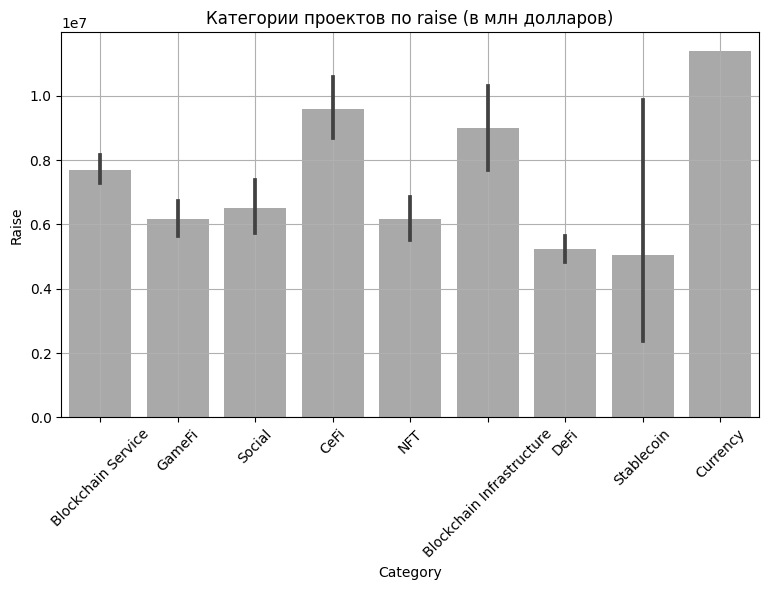

In [ ]:
plt.figure(figsize=(9, 5))
funding_rounds['Category'].value_counts()
sns.barplot(data = funding_rounds_new, x = 'Category', y = 'Raise', color = 'darkgrey')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Категории проектов по raise (в млн долларов)')
plt.show()

> Заметим, что самый большой рейз в категории - это Currency, но данный факт скорее всего обусловлен недостатком данных - в этой категории всего 3 стартапа, как было выведено раннее.
> 
> Также заметим, что лидирующие места по рейзу занимают CeFi и Infra, хотя проектов из этой категории тоже немного.
>
> Подавляющее количество проектов собрано в Blockchain Service, что делает данную категорию скорее всего самую разношерстную по показателям рейза. 
>
> Многие скатегории (NFT, Social, GameFi, DeFi) имеют приблизительно одинаковые показатели рейза.
>
> \
>
> *Тут можно выдвинуть несколько **гипотез**:*
> 1.   Количество проектов в категории и рейз по ней имеют небольшую отрицательную корреляцию -  признаки друг от друга обратно зависимы 
> 2.   Данный категориальный признак оказывает влияние на рейз, но оно несильное (так как многие данные имеют приблизительно одинаковые показатели)
>

**Шаг 2**

Мы рассмотрели следующий признак - Date

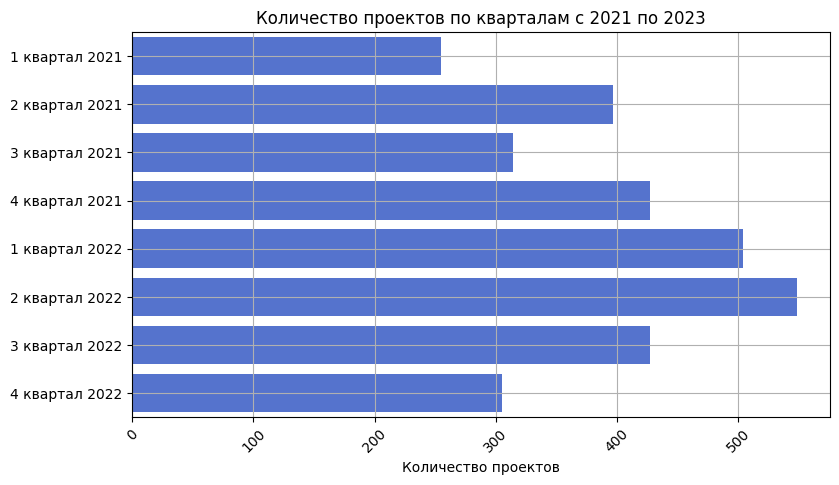

In [ ]:
funding_rounds_Q = funding_rounds_new
first_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] >= '2021-01-01') & (funding_rounds_Q['Date'] <= '2021-03-31')]
second_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-03-31') & (funding_rounds_Q['Date'] <= '2021-06-30')]
third_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-06-30') & (funding_rounds_Q['Date'] <= '2021-09-30')]
forth_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-09-30') & (funding_rounds_Q['Date'] <= '2021-12-31')]
number_projects_1_2021 = len(first_cvar_2021['Project'])
number_projects_2_2021 = len(second_cvar_2021['Project'])
number_projects_3_2021 = len(third_cvar_2021['Project'])
number_projects_4_2021 = len(forth_cvar_2021['Project'])

first_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-01-01') & (funding_rounds_Q['Date'] <= '2022-03-31')]
second_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-03-31') & (funding_rounds_Q['Date'] <= '2022-06-30')]
third_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-06-30') & (funding_rounds_Q['Date'] <= '2022-09-30')]
forth_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-09-30') & (funding_rounds_Q['Date'] <= '2022-12-31')]
number_projects_1_2022 = len(first_cvar_2022['Project'])
number_projects_2_2022 = len(second_cvar_2022['Project'])
number_projects_3_2022 = len(third_cvar_2022['Project'])
number_projects_4_2022 = len(forth_cvar_2022['Project'])

Number_project_per_cvartal = [number_projects_1_2021, number_projects_2_2021, number_projects_3_2021, number_projects_4_2021,
                             number_projects_1_2022, number_projects_2_2022, number_projects_3_2022, number_projects_4_2022]

plt.figure(figsize=(9, 5))
sns.barplot(y = data_cvar, x = Number_project_per_cvartal, color = 'royalblue', orient = "h")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Количество проектов по кварталам с 2021 по 2023')
plt.xlabel('Количество проектов')
plt.show()

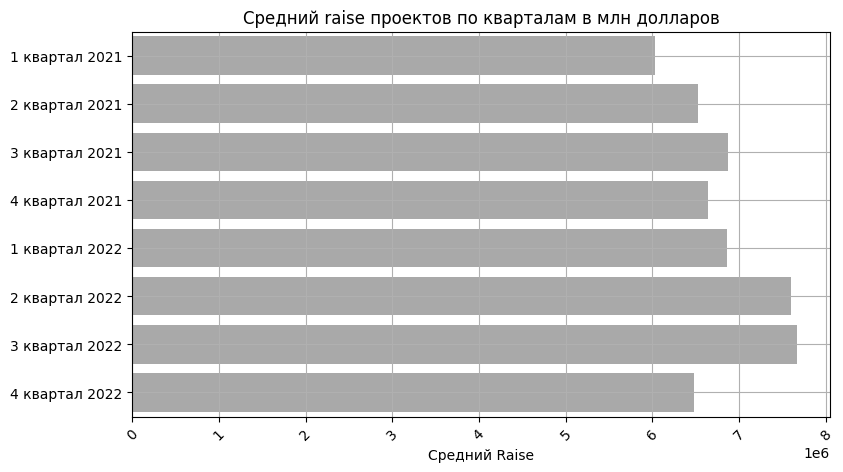

In [ ]:
first_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] >= '2021-01-01') & (funding_rounds_Q['Date'] <= '2021-03-31')]
second_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-03-31') & (funding_rounds_Q['Date'] <= '2021-06-30')]
third_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-06-30') & (funding_rounds_Q['Date'] <= '2021-09-30')]
forth_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-09-30') & (funding_rounds_Q['Date'] <= '2021-12-31')]
mean_raise_1_2021 = first_cvar_2021['Raise'].mean()
mean_raise_2_2021 = second_cvar_2021['Raise'].mean()
mean_raise_3_2021 = third_cvar_2021['Raise'].mean()
mean_raise_4_2021 = forth_cvar_2021['Raise'].mean()


first_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-01-01') & (funding_rounds_Q['Date'] <= '2022-03-31')]
second_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-03-31') & (funding_rounds_Q['Date'] <= '2022-06-30')]
third_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-06-30') & (funding_rounds_Q['Date'] <= '2022-09-30')]
forth_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-09-30') & (funding_rounds_Q['Date'] <= '2022-12-31')]
mean_raise_1_2022 = first_cvar_2022['Raise'].mean()
mean_raise_2_2022 = second_cvar_2022['Raise'].mean()
mean_raise_3_2022 = third_cvar_2022['Raise'].mean()
mean_raise_4_2022 = forth_cvar_2022['Raise'].mean()
data_cvar = ['1 квартал 2021', '2 квартал 2021', '3 квартал 2021', '4 квартал 2021', '1 квартал 2022', '2 квартал 2022', '3 квартал 2022', '4 квартал 2022']
mean_raise = [mean_raise_1_2021, mean_raise_2_2021, mean_raise_3_2021, mean_raise_4_2021, mean_raise_1_2022, mean_raise_2_2022, mean_raise_3_2022, mean_raise_4_2022]


plt.figure(figsize=(9, 5))
sns.barplot(y = data_cvar, x = mean_raise, color = 'darkgrey', orient = "h")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Средний raise проектов по кварталам в млн долларов')
plt.xlabel('Средний Raise')
plt.show()

> По получившимся графикам прослеживается корреляция с ценами криптовалютного рынка: 
> *   пандемия в 2021 году привела к огромному скачку капитализаций цифровых активов и вызвало огромный интерес к криптовалюте, что послужило стимвулом создания проектов в Web3 и инвестирования в быстроменяющиеся тренды растущего рынка 
> *   во 2-3 квартале 2022 года произошел обвал криптовалютного сегмента, что послужило началом криптозимы
>
> Есть два типа инвесторов: те, кто входят в много проектов с низкими чеками и те, кто инвестируют очень изборочно, но с большим ticketsize. Так криптозима могла сказаться и на тех, и на тех, но в разной мере.
>
> Как мы видим количество проектов, которые собирают раунды резко снизилось с падением цен активов, а вот показатель сренего рейза хоть и снизился, но не так резко, как того ожидалось. Это можно объяснить несколькими причинами:
> *   Многие проекты перенесли свои запуски на биржах (как на CEX, так и на DEX) из-за непопулярности рынка и большого риска плохого лаунча
> *   Многие фонды и инвесторы потеряли свои активы и у них нет возможности продолжать деятельность, а это в большей мере фонды tier 3-5. Средние/слабые проекты это понимают и поэтому не начинают или затягивают раунды
> *   Но сильные фонды продолжают деятельность, так еще и более активно, так как лучше инвестировать и покупать активы на низах рынка, поэтому показатель среднего рейза не так сильно упал, ведь tier 1-2 фонды имеют высокий AUM, даже после обвала рынка и готовы заходить в сильные проекты во время криптозимы даже с большими суммами
> 
> \
>
> *Тут можно выдвинуть несколько **гипотез**:*
> 1.   Дата оказывает влияние на рейз (в 1Q 2022 показатель растет, в 3Q снижается), но не так значительно, как количество стартапов, которые поднимают рейз
> 

# Машинное обучение


Что касается блока "Машинное обучение", то тут седующие планы:


1.   В качестве переменной, которую будем предсказывать, выбрали колонку RAISE
2.   Так как в Raise находятся вещественные числа, будем обучать модель линейной регрессии
3.   Будем проводить скалирование и регуляризацию
4.   Скорее всего, разбиение выборки будет на трэйн и тетс в соотношении 70/30 или 80/20
5.   Для кодирования будем использова
6.   Для модели будем использовать следующие метрики: MSE, MAE, MAPE, HUBER_LOSS, MSLE и другие метрики
7.  Возможно добавления ещё одних данных, с уточнением по инвесторам (рыночная капитализация, торговый объём в 24 часа, коэффициент доминации на рынке). Далее будет проведена работа над признаками: использование полиномов, отбор на основе корреляции или дисперсии.

